# <center> Project Title - Diwali Sales Analysis <center>
 
# Shashank Dwivedi

# *Importing necessary libraries*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

#  *Loading Dataset*

In [2]:
diwali = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

#  *Data Exploration*

#### Shape of Data

In [3]:
diwali.shape

(11251, 15)

#### Top 5 Rows of Data

In [4]:
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#### Basic Info about Data

In [5]:
diwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### Statics of our Data

In [6]:
diwali.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


#  Data Preparation and Cleaning

#### Dropping Blank Columns

In [7]:
diwali.drop(['Status', 'unnamed1'], axis=1, inplace=True)

#### Checking for null values in Data

In [8]:
pd.isnull(diwali).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#### Dropping null values

In [9]:
diwali.dropna(inplace=True)

#  Data Transformation: Handling Amount

#### Changing data type of Amount columns

In [10]:
diwali['Amount'] = diwali['Amount'].astype('int')

#### Checking Data types of amount column

In [11]:
diwali['Amount'].dtypes

dtype('int32')

#### Checking Columns name

In [12]:
diwali.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Changing Marital_Status value in Married and Un-Married

In [13]:
diwali["Marital_Status"]=diwali["Marital_Status"].map({0:"Married",1:"Un-Married"})

In [14]:
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Un-Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Un-Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Un-Married,Gujarat,Western,Food Processing,Auto,2,23877


#  <Center> Exploratory Analysis and Visualization

##  Asking and Answering Questions

- **Lets find out some more about Diwali sales Data. Below some questions regarding Diwali sales Data will be answerred.**

1. How many buyers are male and female?
2. How much money did the male and the female spend in the Diwali sale?
3. What age group are the most buyers?
4. How much money was spent by age group.
5. Which state has the highest number of orders for the Diwali sale?
6. State-wise how much money was spent in Diwali sales?
7. Who orders more on Diwali sales, married or single?
8. Who spent more money on Diwali sales, married or single?
9. Which profession has the highest number of orders in the Diwali sale?
10. People of which profession spent more money in Diwali sale?
11. Which product sold the most in the Diwali sale?
12. Which product sold the most in the Diwali sale?

## 1. How many buyers are male and female?

#### Plotting a bar chart for Gender and it's count

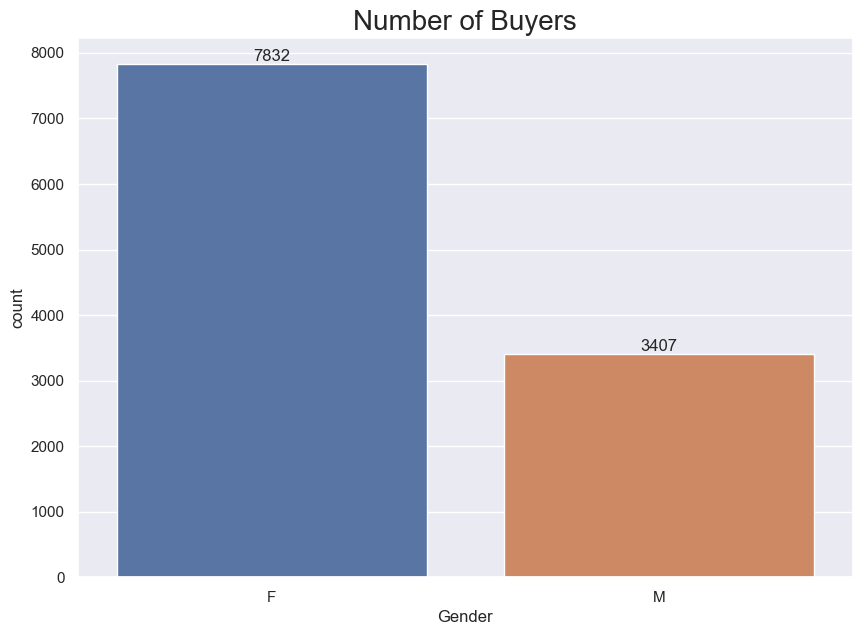

In [37]:
sns.set(rc={'figure.figsize':(10,7)})
Gender = sns.countplot(x = 'Gender',data = diwali)

for bars in Gender.containers:
    Gender.bar_label(bars)
plt.title("Number of Buyers",fontsize=20)
plt.show()

* Of these, 7832 are females and 3407 are males.

*From above graph we can see that most of the buyers are females*

## 2. How much money did the male and the female spend in the Diwali sale?

#### Plotting a bar chart for gender vs total purchasing money

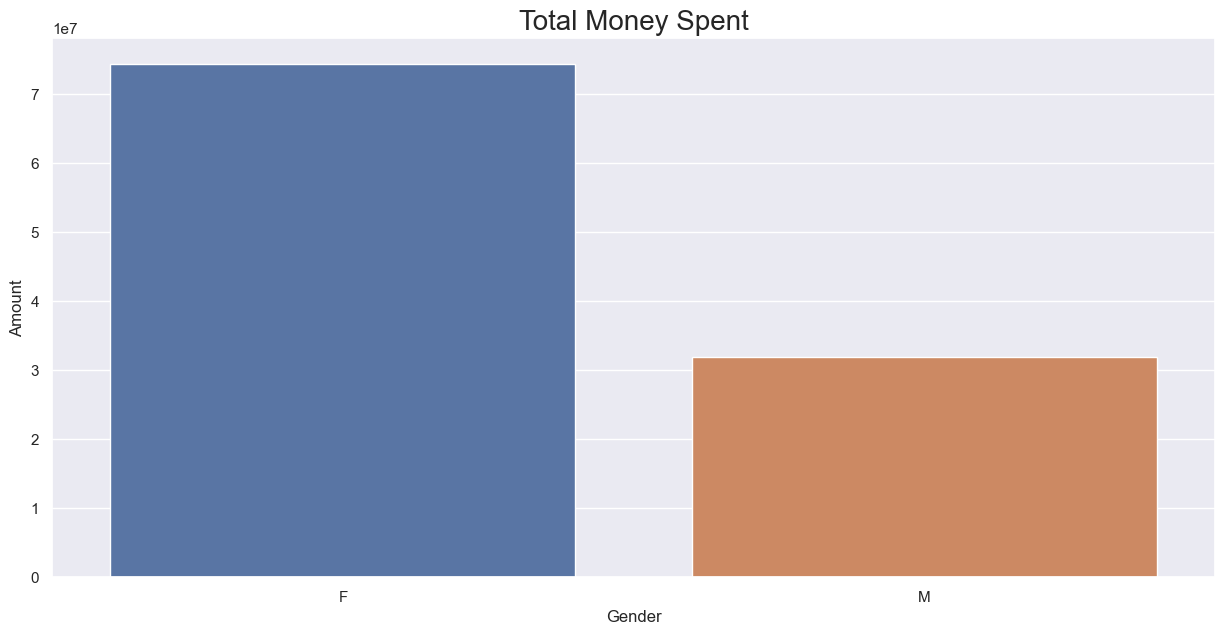

In [36]:
sns.set(rc={"figure.figsize":(15,7)})
sales_cat = diwali.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sales_gender=sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_cat)
plt.title("Total Money Spent",fontsize=20)
plt.show()

* Money Spent by Males are 31913276
* Money Spent by Females are 74335853

*From above graph we can see that purchasing power of females are greater than men.*

# 3.What age group are the most buyers?

#### Age wise number of buyers group

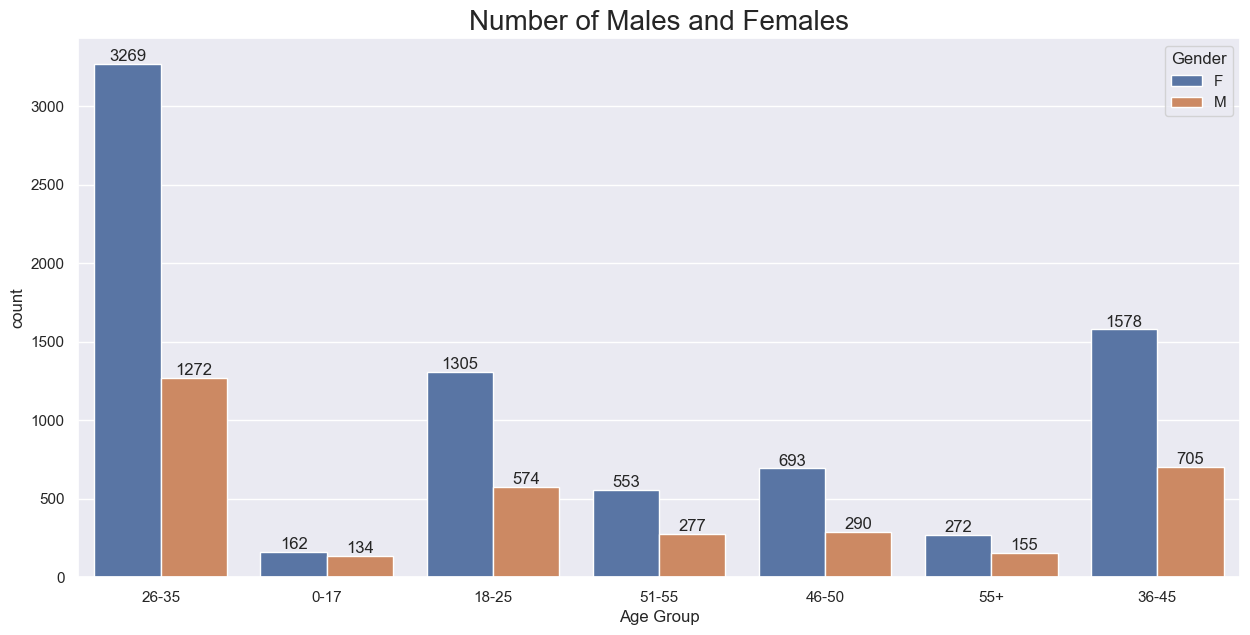

In [34]:
sns.set(rc={"figure.figsize":(15,7)})
age = sns.countplot(data = diwali, x = 'Age Group', hue = 'Gender')

for bars in age.containers:
    age.bar_label(bars)
plt.title("Number of Males and Females",fontsize=20)
plt.show()

* Most buyers are belongs age group (26-35)

*From above graph we can see that the most buyers are belongs age group (26-35) and no. of Female buyers is greater than Male.*

# 4. How much money was spent by age group?

#### Total sales Amount vs Age Group

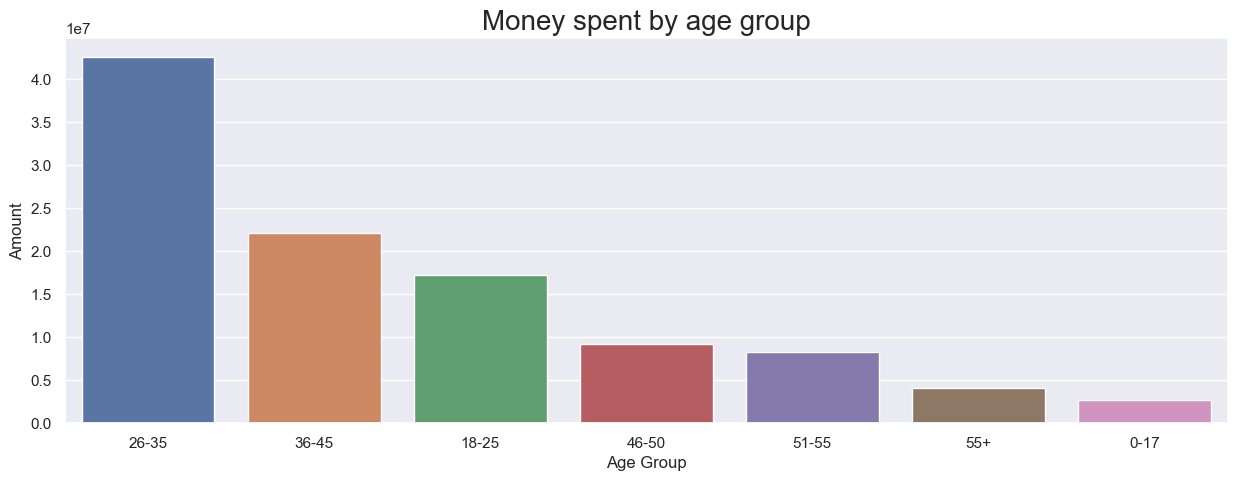

People in the age group of 26-35 spent Rs 42613442 during the Diwali sale.
People in the age group of 36-45 spent Rs 22144994 during the Diwali sale.
People in the age group of 18-25 spent Rs 17240732 during the Diwali sale.
People in the age group of 46-50 spent Rs 9207844 during the Diwali sale.
People in the age group of 51-55 spent Rs 8261477 during the Diwali sale.
People in the age group of 55+ spent Rs 4080987 during the Diwali sale.
People in the age group of 0-17 spent Rs 2699653 during the Diwali sale.


In [18]:
sales_age = diwali.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data =sales_age)
plt.title("Money spent by age group",fontsize=20)
plt.show()
# Money Spent by age groups.
for Age_group,Amount in zip(sales_age["Age Group"],sales_age["Amount"]):
    print(f"People in the age group of {Age_group} spent Rs {Amount} during the Diwali sale.",end="\n")

*From above graph we can see that the purchasing power of age group between 26-35 yrs*

# 5. Which state has the highest number of orders for the Diwali sale?

#### Top 10 States for Diwali Sale Orders

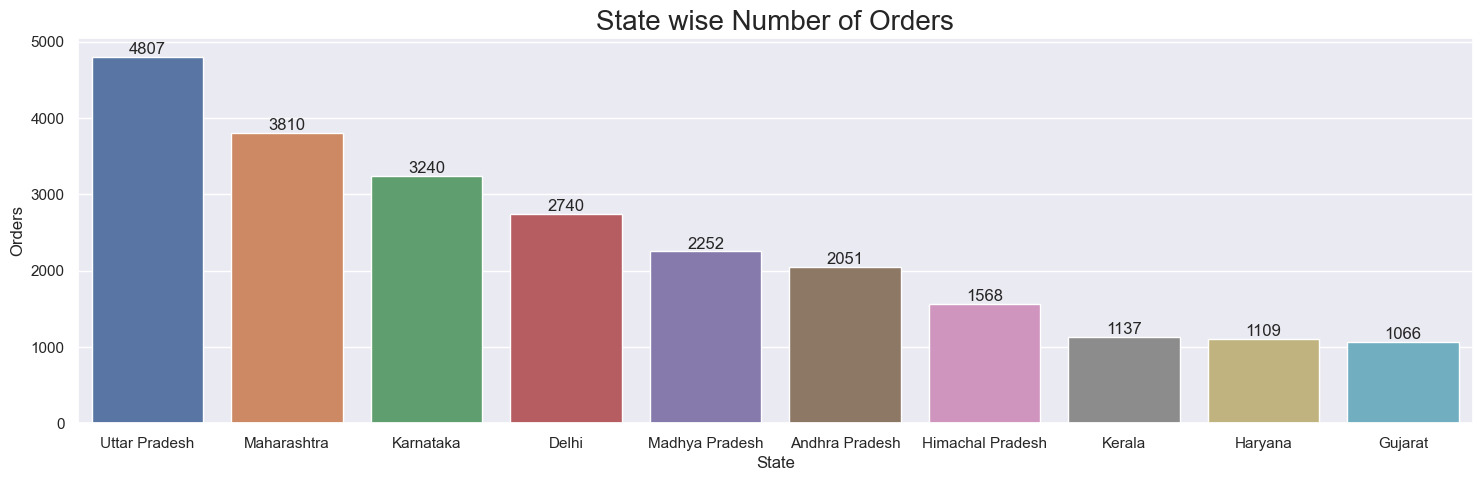

In [19]:
sales_state_order = diwali.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
state_sales=sns.barplot(data = sales_state_order, x = 'State',y= 'Orders')
for sale in state_sales.containers:
    state_sales.bar_label(sale)
    plt.title("State wise Number of Orders",fontsize=20)
plt.show()

* Most of Orders booked by Uttar Pradesh.
* 4807 orders booked from the state of Uttar Pradesh.

*From above graph we can see that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively*

# 6. State-wise how much money was spent in Diwali sales?

#### Total amount vs. sales from top 10 states

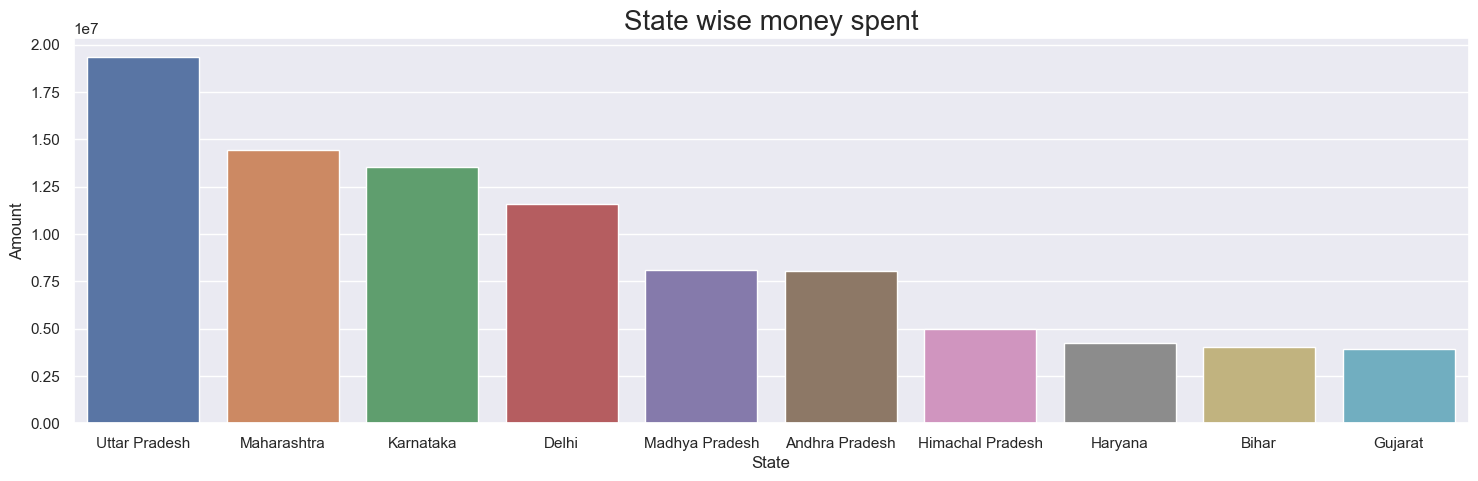

People in  Uttar Pradesh spent Rs 42613442 during the Diwali sales.
People in  Maharashtra spent Rs 22144994 during the Diwali sales.
People in  Karnataka spent Rs 17240732 during the Diwali sales.
People in  Delhi spent Rs 9207844 during the Diwali sales.
People in  Madhya Pradesh spent Rs 8261477 during the Diwali sales.
People in  Andhra Pradesh spent Rs 4080987 during the Diwali sales.
People in  Himachal Pradesh spent Rs 2699653 during the Diwali sales.


In [20]:
sales_state = diwali.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.title("State wise money spent",fontsize=20)
plt.show()

#state wise Sales
for State,Amount in zip(sales_state["State"],sales_age["Amount"]):
    print(f"People in  {State} spent Rs {Amount} during the Diwali sales.",end="\n")

*From above graph we can see that most of  total sales vs amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


# 7. Who orders more on Diwali sales, married or single?

#### Number of buyers by marital status wise

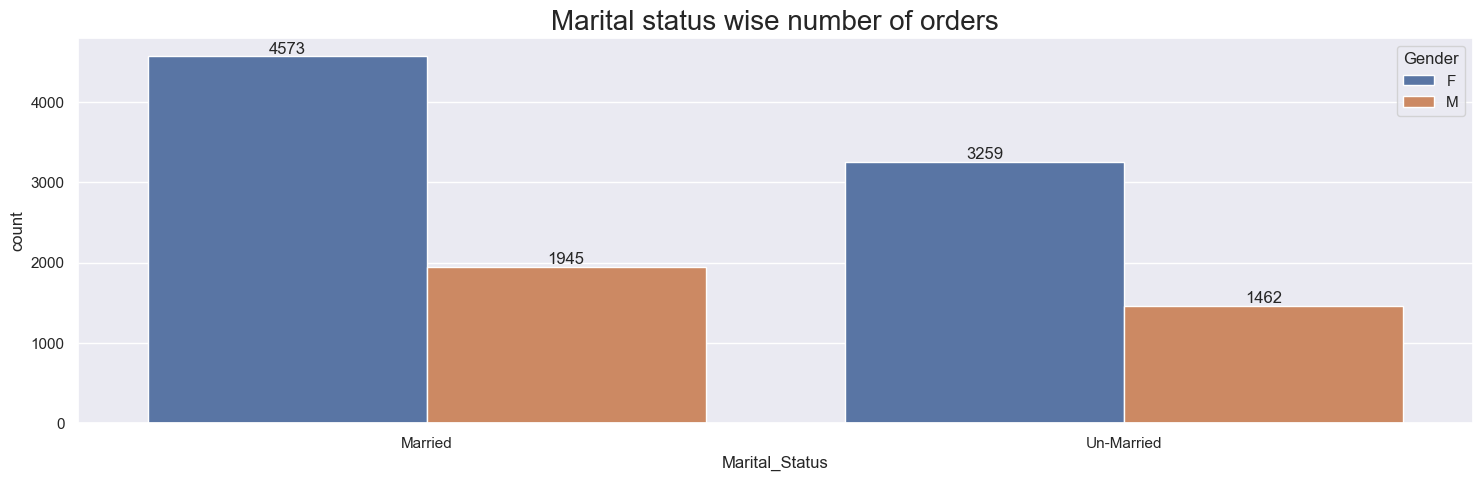

In [21]:
marital = sns.countplot(data = diwali, x = 'Marital_Status',hue="Gender")

sns.set(rc={'figure.figsize':(8,5)})
for bars in marital.containers:
    marital.bar_label(bars)
plt.title("Marital status wise number of orders",fontsize=20)
plt.show()

* Married people did the most shopping in Diwali sale.

*From above graph we can see that most of the buyers are married (women).*

# 8. Who spent more money on Diwali sales, married or single?

#### Total Sales amount vs Marital Status

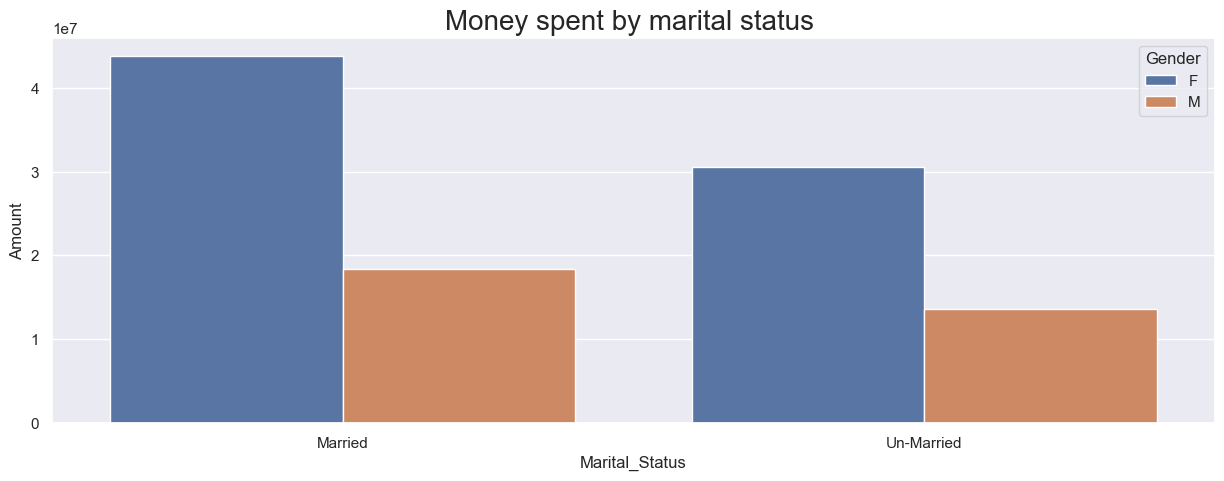

In [22]:
sales_Marital = diwali.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount']\
                            .sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_Marital, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.title("Money spent by marital status ",fontsize=20)
plt.show()

* Married People spent more money Diwali sales.

*From above graph we can see that most of the buyers are married (women) and they have high purchasing power.*

# 9. Which profession has the highest number of orders in the Diwali sale?

#### Number of buyers by Occupation wise

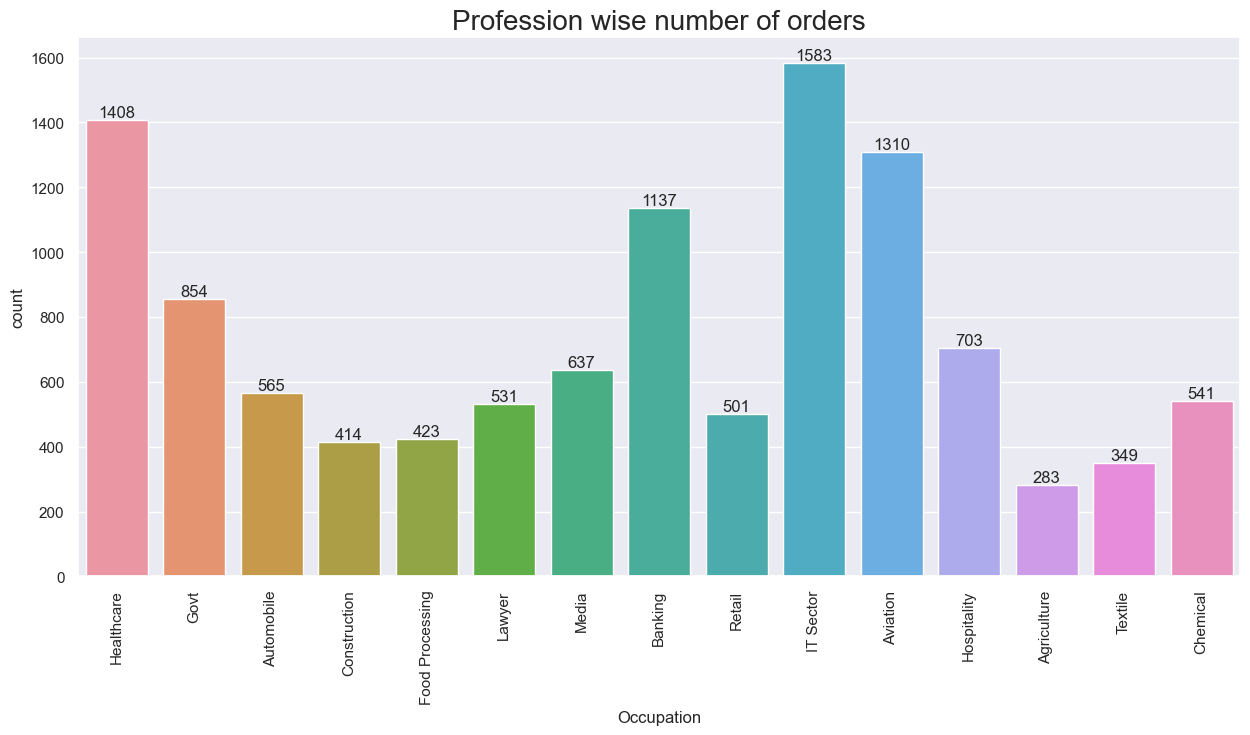

In [23]:
sns.set(rc={'figure.figsize':(15,7)})
occupation = sns.countplot(data = diwali, x = 'Occupation')

for bars in occupation.containers:
    occupation.bar_label(bars)
plt.title("Profession wise number of orders",fontsize=20)
plt.xticks(rotation=90)
plt.show()

* Most people from IT sector(1583) did shopping in Diwali Sales.

*From above graph we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# 10. People of which profession spent more money in Diwali sale?

#### Net Sales Amount Vs Occupation Wise 

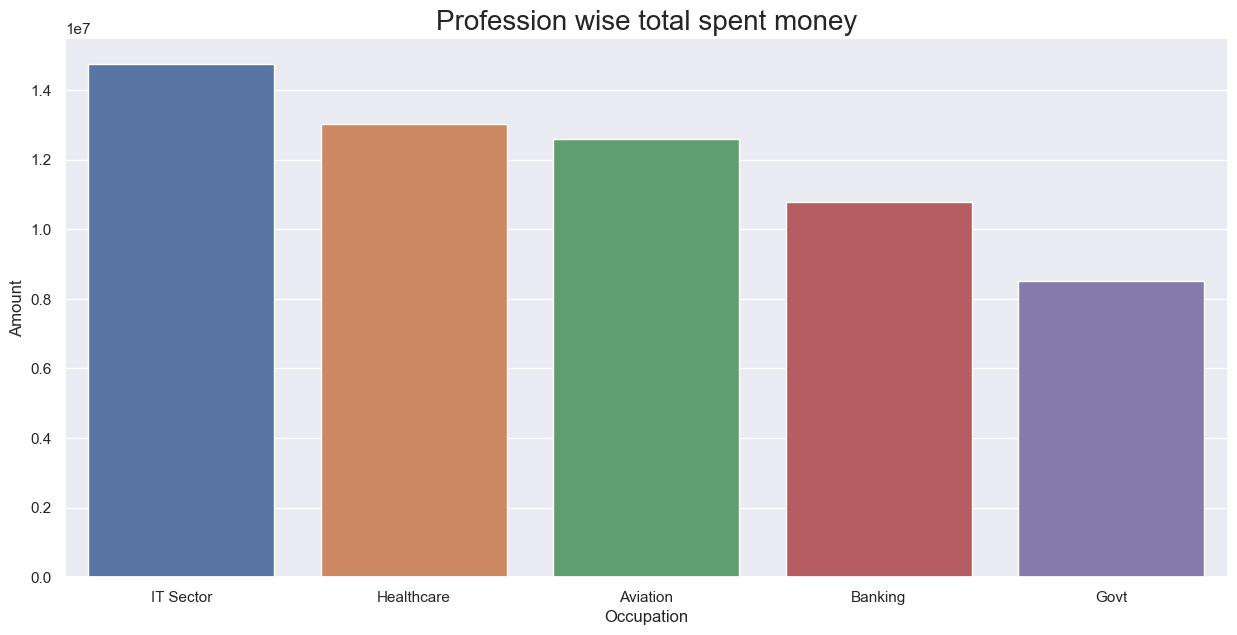

IT Sector people spent 14755079 money in Diwali sales.
Healthcare people spent 13034586 money in Diwali sales.
Aviation people spent 12602298 money in Diwali sales.
Banking people spent 10770610 money in Diwali sales.
Govt people spent 8517212 money in Diwali sales.


In [24]:
sales_profession = diwali.groupby(['Occupation'], as_index=False)['Amount']\
                            .sum().sort_values(by='Amount', ascending=False).head()

sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = sales_profession, x = 'Occupation',y= 'Amount')
plt.title("Profession wise total spent money",fontsize=20)
plt.show()
# Total money spent by profession wise.
for Occupation,Amount in zip(sales_profession["Occupation"],sales_profession["Amount"]):
    print(f"{Occupation} people spent {Amount} money in Diwali sales.")

* IT sector people spent more money in Diwali sales.

*From the above graph we can see that majority of the sales are genrated to buyers working in IT, Healthcare and Aviation sectors*

# 11. Which product category sold the most in the Diwali sale?

#### Product Category wise sales

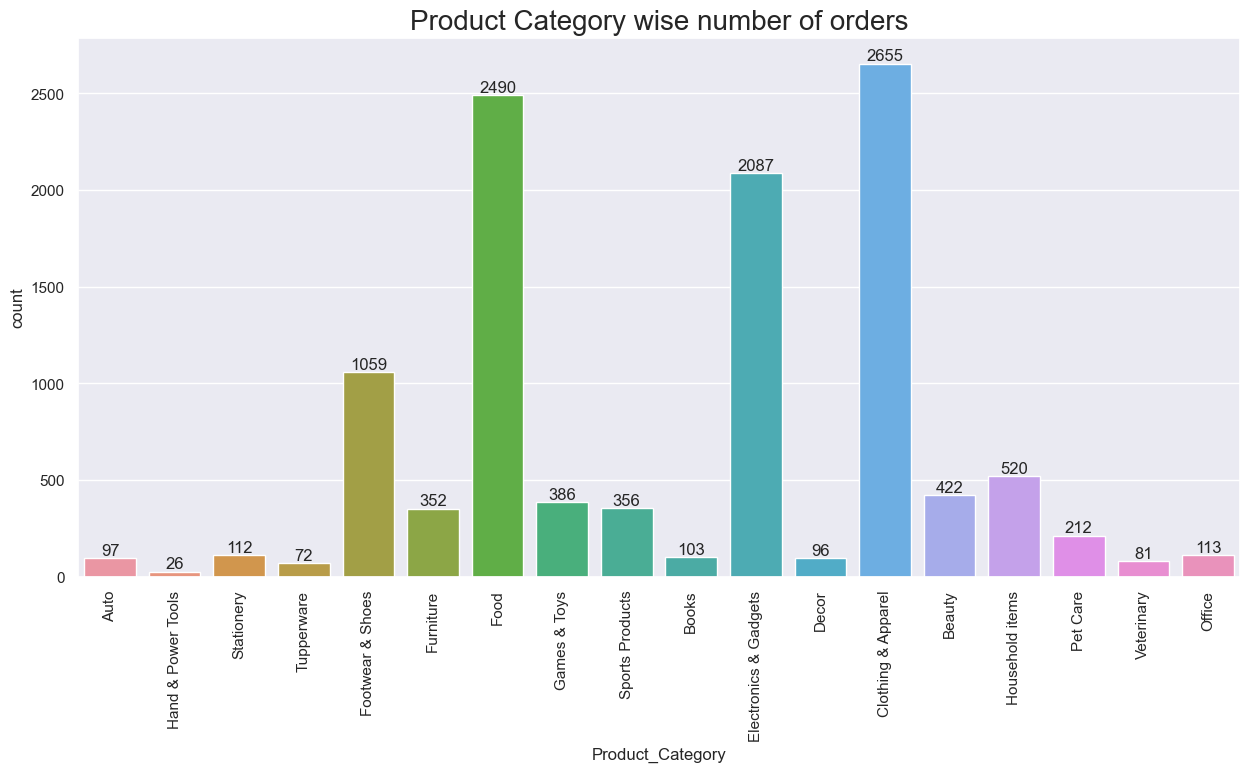

In [25]:
sns.set(rc={'figure.figsize':(15,7)})
sales_product = sns.countplot(data = diwali, x = 'Product_Category')

for bars in sales_product.containers:
    sales_product.bar_label(bars)
plt.xticks(rotation=90)
plt.title("Product Category wise number of orders",fontsize=20)
plt.show()

* Most Ordered in Clothing & Apparel Category

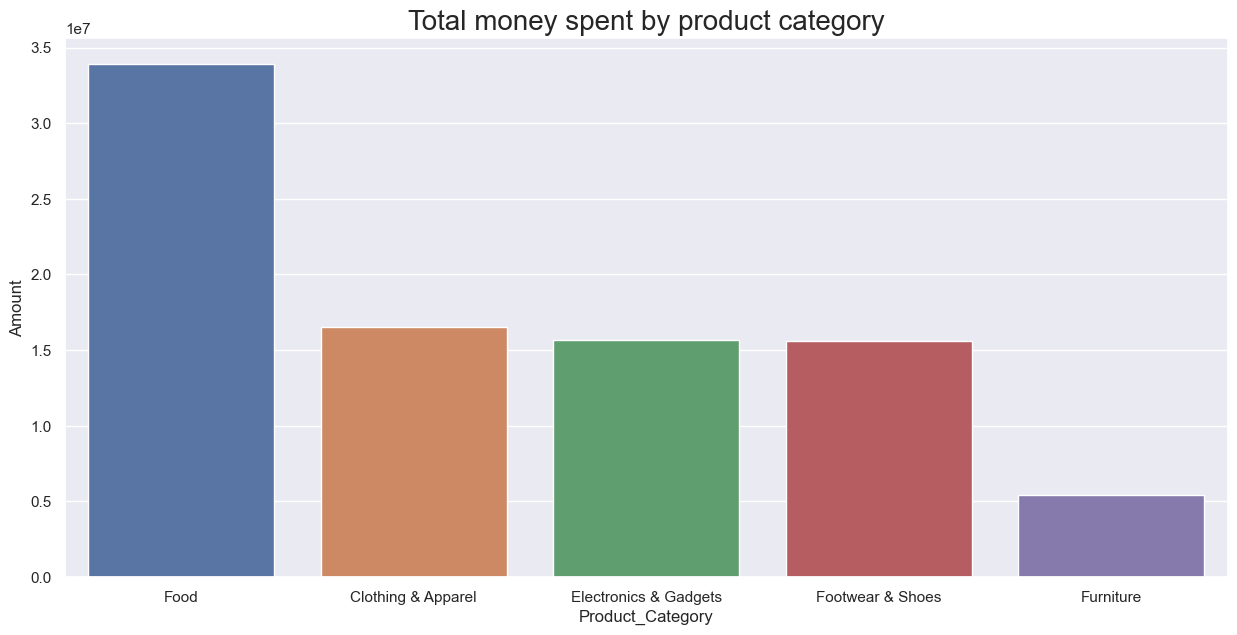

In [32]:
sales_product_cat = diwali.groupby(['Product_Category'], as_index=False)['Amount'].sum()\
                    .sort_values(by='Amount', ascending=False).head()

sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = sales_product_cat, x = 'Product_Category',y= 'Amount')
plt.title("Total money spent by product category",fontsize=20)
plt.show()

* Food category spends the most money in Diwali sales.

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

# 12. Which product sold the most in the Diwali sale?

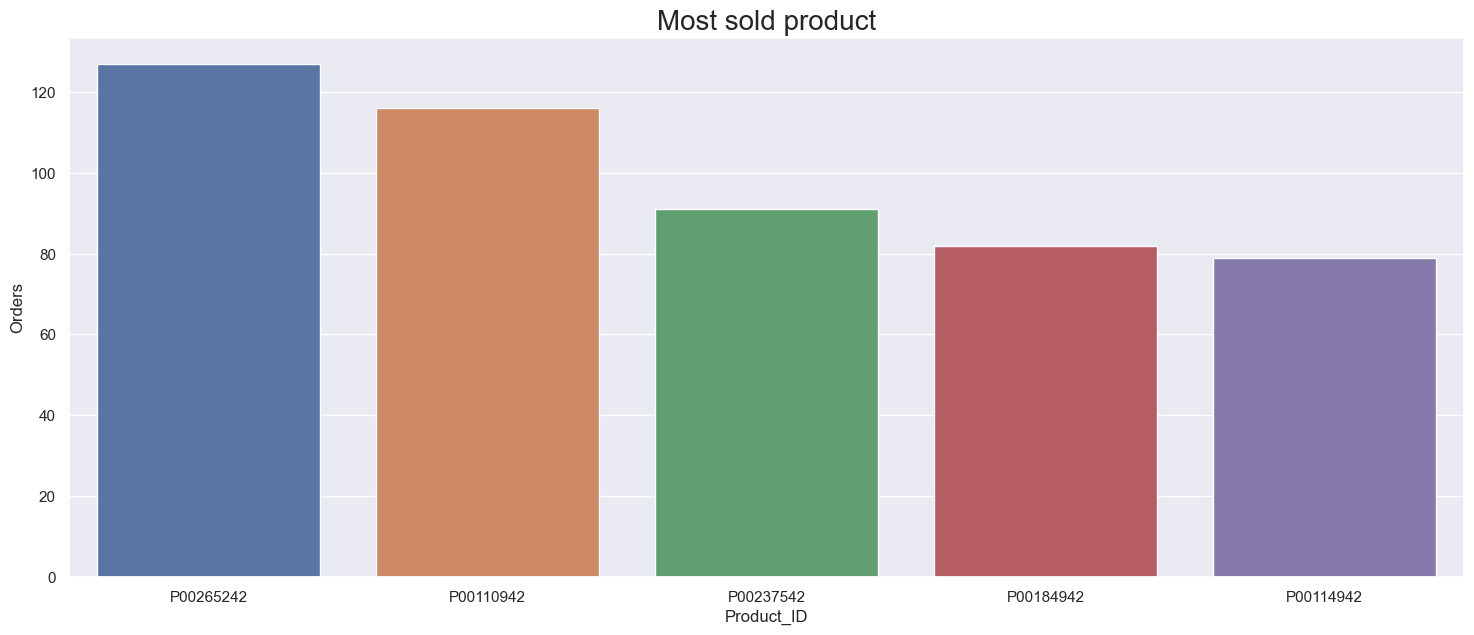

In [33]:
sales_pro_id = diwali.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head()

sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data = sales_pro_id, x = 'Product_ID',y= 'Orders')
plt.title("Most sold product",fontsize=20)
plt.show()

* Product ID **P00265242** is most sold in Diwali Sales

## <center>Conclusion:

**Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category**